In [2]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv("cement_data.csv")


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Data Description
Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable 

In [6]:
data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

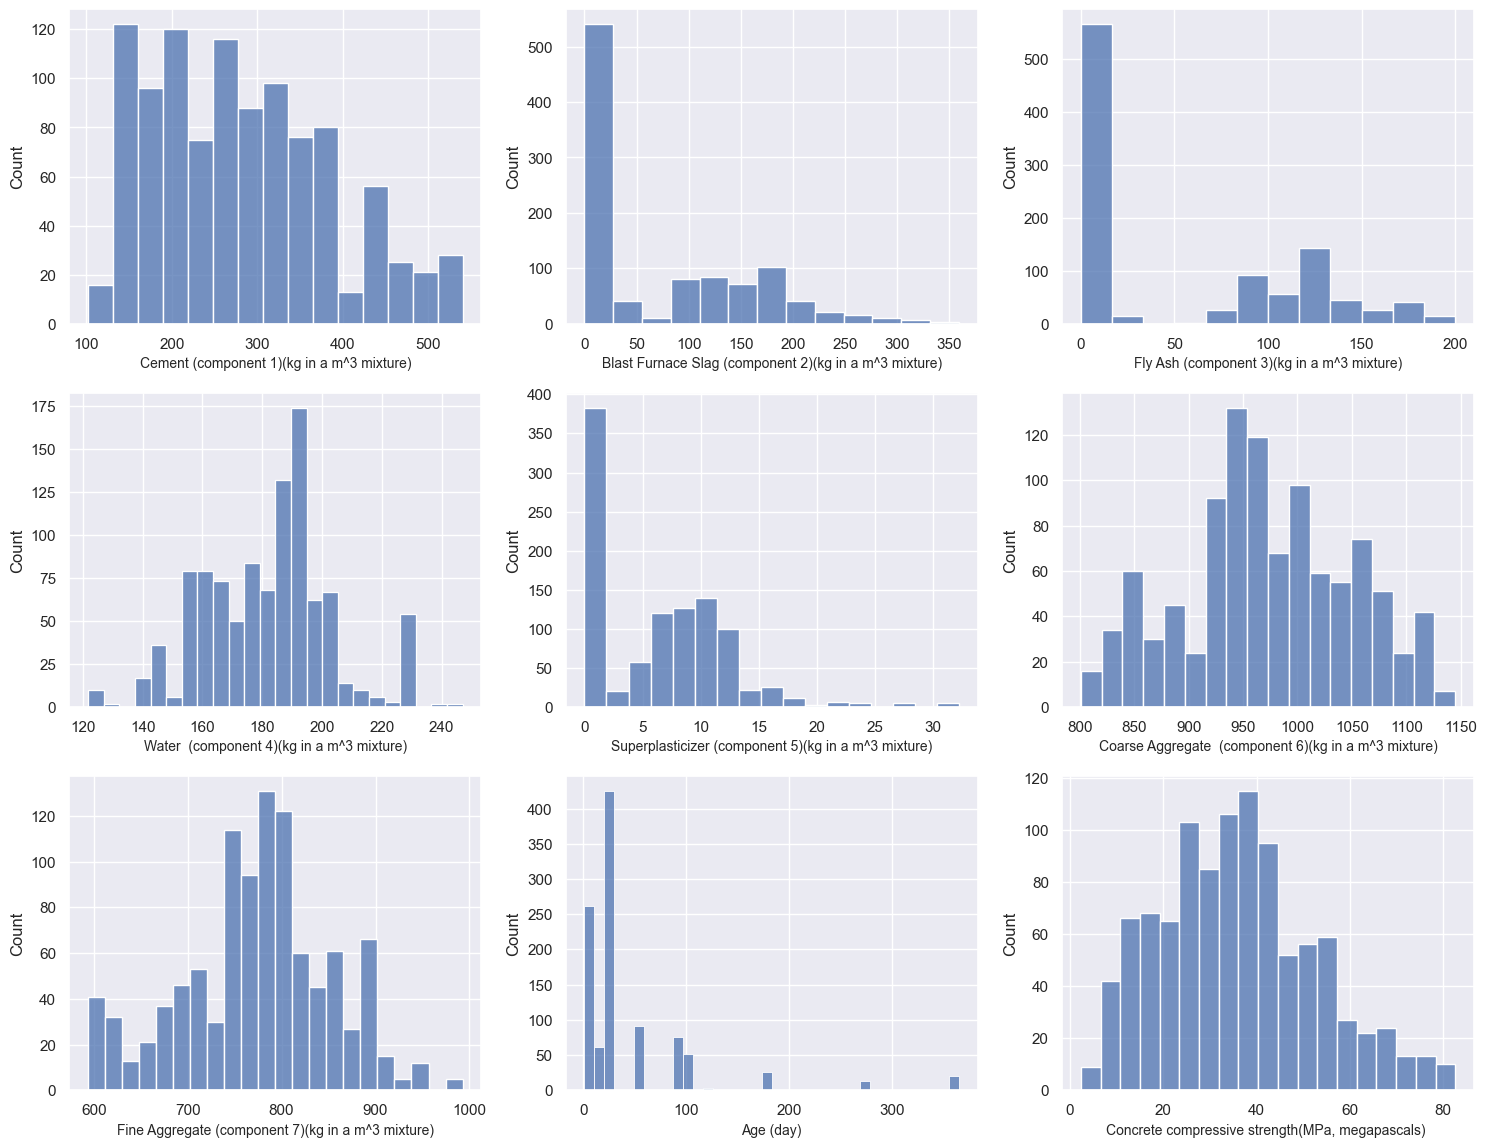

In [7]:
plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in data.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.histplot(data[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.tight_layout()

## Report
- As we can see some of the columns are following the normal distribution while some of the columns has discrete values.

## Data Transformation

In [8]:
X = data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)

In [9]:
y = data['Concrete compressive strength(MPa, megapascals) ']

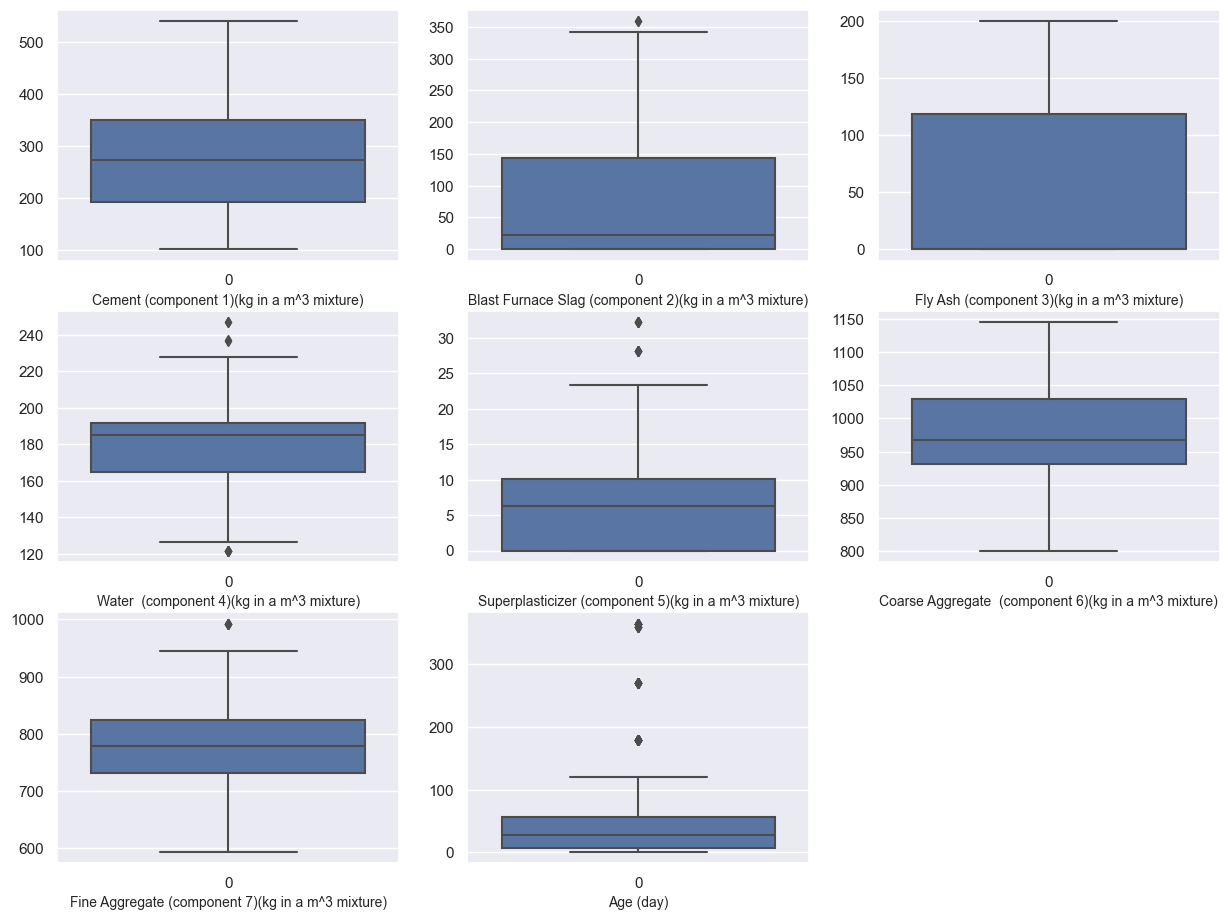

In [10]:
# let's check for outliers 

plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    #data[column]+=1
    sns.boxplot((X[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

## Outlier report

- As we can see there are some of the column which are having outliers, so we might have to deal with the outliers in transformation stage.

In [21]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [23]:
outlier_columns = [
    "Blast Furnace Slag (component 2)(kg in a m^3 mixture)",
    "Water  (component 4)(kg in a m^3 mixture)",
    "Superplasticizer (component 5)(kg in a m^3 mixture)",
    "Fine Aggregate (component 7)(kg in a m^3 mixture)",
    "Age (day)"
        
]

In [27]:
def apply_outliers_capping(dataframe:pd.DataFrame, outliers_columns: list):

    df = dataframe.copy()
    for column in outliers_columns:

        percentile25 = df[column].quantile(0.25)
        percentile75 = df[column].quantile(0.75)
        iqr = percentile75 - percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        df.loc[(df[column]>upper_limit), column]= upper_limit
        df.loc[(df[column]<lower_limit), column]= lower_limit   
    

    return df

df = apply_outliers_capping(dataframe=data, outliers_columns= outlier_columns)

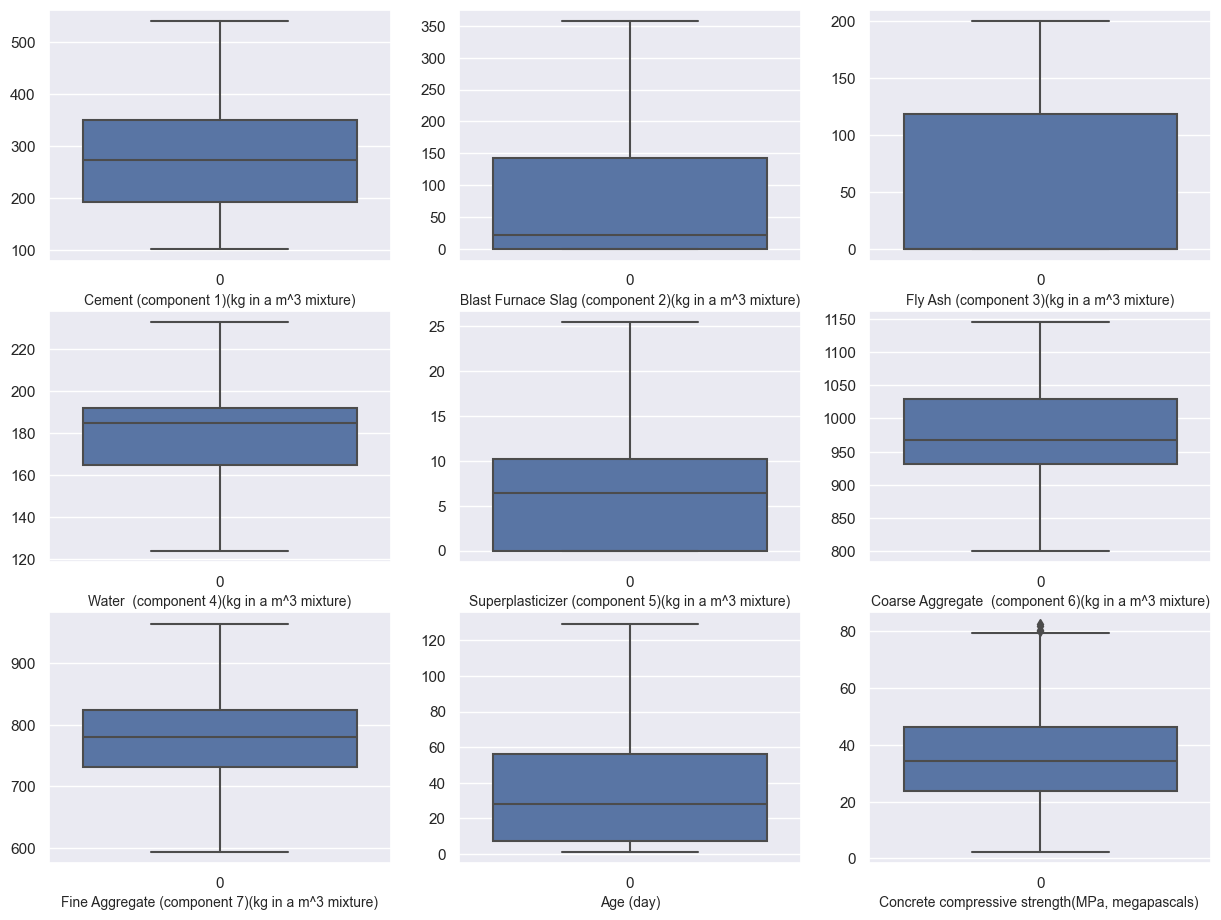

In [29]:
# let's check for outliers 

plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in df.columns:
    ax = plot.subplot(4,3,plotnumber)
    #data[column]+=1
    sns.boxplot((df[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

**We can see now, the outliers are now successfully mapped**

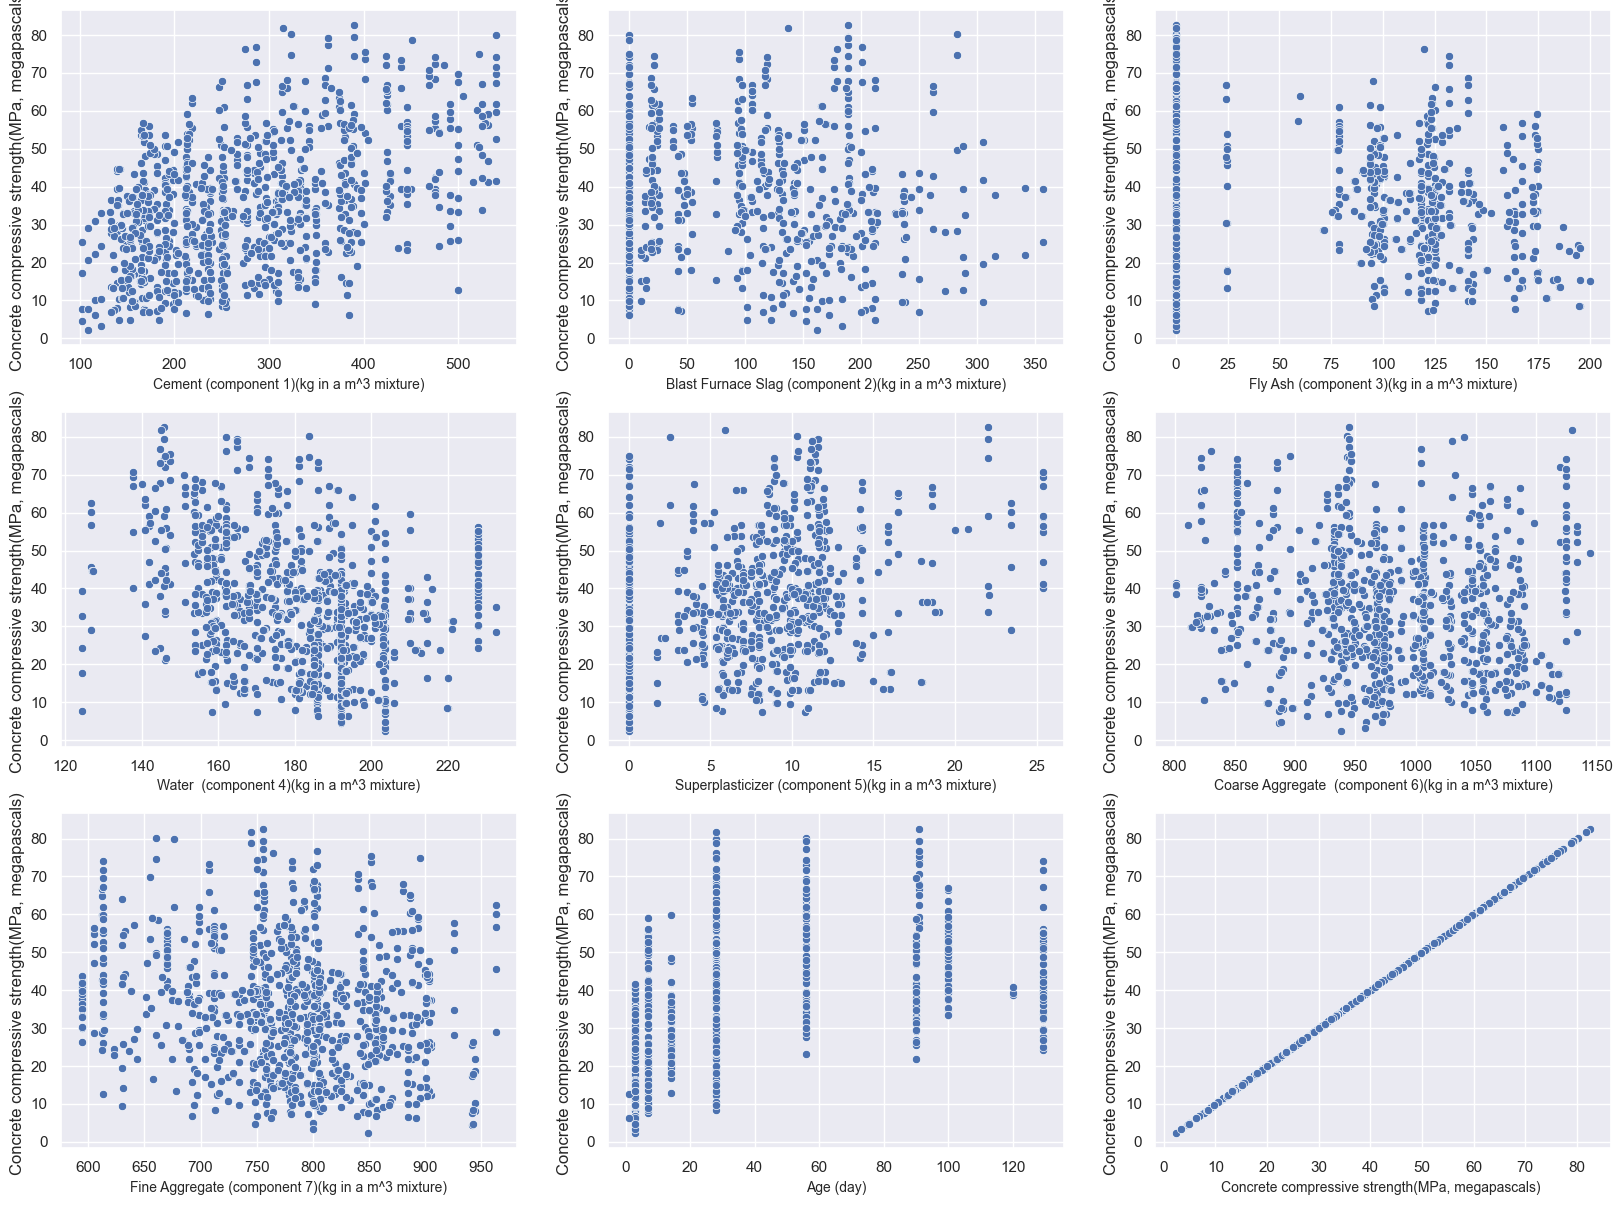

In [30]:
# let's check how our features are related to the target column
plot.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in df.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.scatterplot(data = data, x = df[column],y = y)
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

Well the relationship doesn't look particularly linear but we will try using Linear Regression and see how it works on our data.
We will also Random forest regressor and compare our results from both the models.

In [12]:
# let's check for correaltion using heatmap

<Axes: >

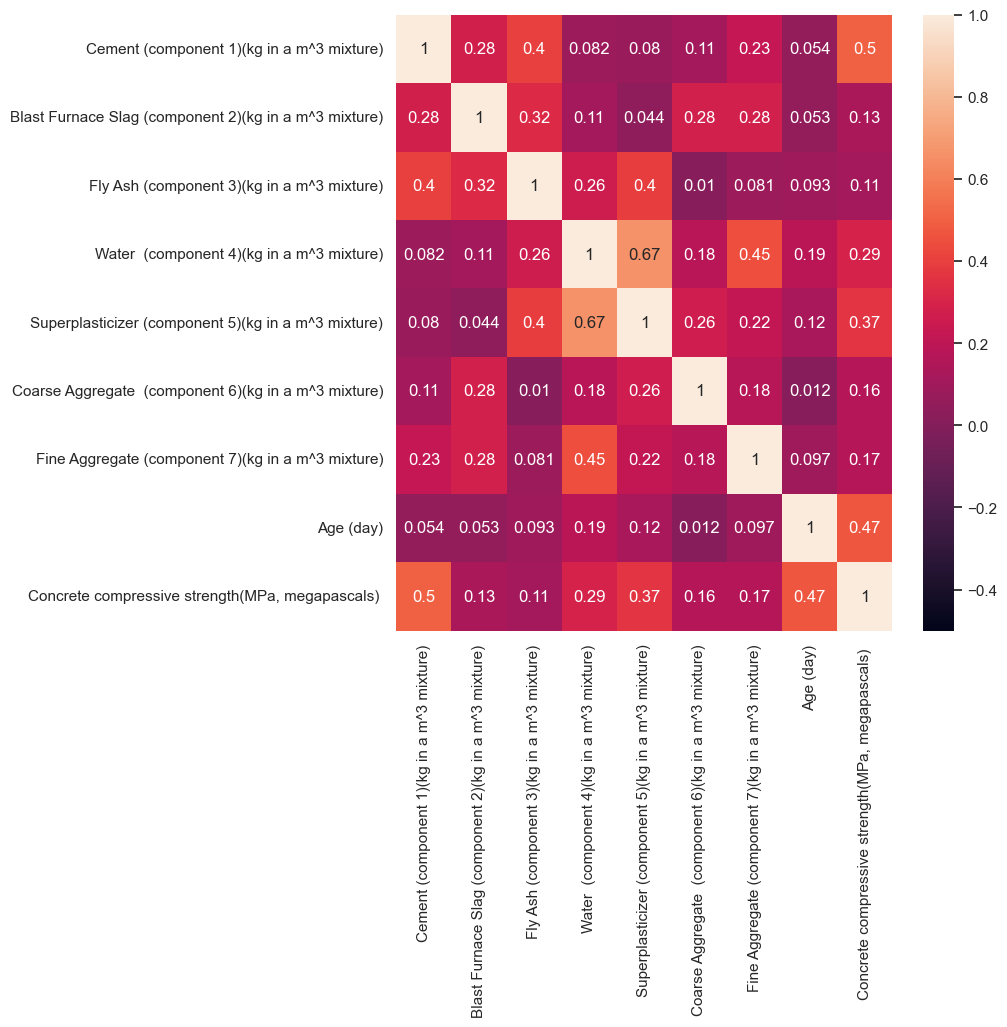

In [31]:
plot.figure(figsize=(8,8))
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(df.corr().abs(), vmin = -0.5,vmax = 1,annot=True) #matplotlib  3.0.3 , ther is an issue with 3.1.1 , annotation gets cut from top and bottom


Great! none of our columns seem to be correlated.

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="Concrete compressive strength(MPa, megapascals) ", axis= 1)

y = df["Concrete compressive strength(MPa, megapascals) "]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)


In [15]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score



def check_model_performance(preprocessor,X_train, y_train,X_test,y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1),
        'Lasso Regression': Lasso(alpha=1),
        'Random Forest Regression': RandomForestRegressor(n_estimators=100, max_depth=5),
        'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
    }

    # Fit and evaluate each model
    for model_name, model in models.items():
        # Create the pipeline
        pipeline = make_pipeline(preprocessor, model)

        # Fit the pipeline to the training data
        pipeline.fit(X_train, y_train)

        # Evaluate the pipeline on the test data
        y_pred = pipeline.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Print the mean squared error
        print(f'{model_name} - Mean Squared Error: {mse:.2f}')
        print(f'{model_name} - r2 score: {r2:.2f}')


In [16]:
# Define the preprocessing pipeline
preprocessor_01 = make_pipeline(KNNImputer(n_neighbors=3), StandardScaler())
preprocessor_02 = make_pipeline(KNNImputer(n_neighbors=3), RobustScaler())
preprocessor_03 = make_pipeline(KNNImputer( n_neighbors=3), MinMaxScaler())

print(f"{'='*10}result for standardScaler {'='*10}\n")
check_model_performance(preprocessor_01,X_train, y_train,X_test,y_test)

print(f"\n{'='*10}result for robustScaler {'='*10}\n")
check_model_performance(preprocessor_02,X_train, y_train,X_test,y_test)

print(f"\n{'='*10}result for minmaxScaler {'='*10}\n")
check_model_performance(preprocessor_03,X_train, y_train,X_test,y_test)



==========result for standardScaler ==========

Linear Regression - Mean Squared Error: 100.33
Linear Regression - r2 score: 0.63
Ridge Regression - Mean Squared Error: 100.51
Ridge Regression - r2 score: 0.63
Lasso Regression - Mean Squared Error: 123.07
Lasso Regression - r2 score: 0.55
Random Forest Regression - Mean Squared Error: 48.62
Random Forest Regression - r2 score: 0.82
Gradient Boosting Regression - Mean Squared Error: 30.68
Gradient Boosting Regression - r2 score: 0.89

==========result for robustScaler ==========

Linear Regression - Mean Squared Error: 100.33
Linear Regression - r2 score: 0.63
Ridge Regression - Mean Squared Error: 100.81
Ridge Regression - r2 score: 0.63
Lasso Regression - Mean Squared Error: 128.60
Lasso Regression - r2 score: 0.53
Random Forest Regression - Mean Squared Error: 47.14
Random Forest Regression - r2 score: 0.83
Gradient Boosting Regression - Mean Squared Error: 30.64
Gradient Boosting Regression - r2 score: 0.89

==========result for min

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

gb_regressor = GradientBoostingRegressor()

grid_search = GridSearchCV(gb_regressor, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [20]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

print(f"r2 score of best model is : {'%.2f' % r2_score(y_test, predictions)}")

r2 score of best model is : 0.91
